1. 6번 파일(8월 27일 기준 ETF의 구성 종목)에서 시가총액 큰 것 순서대로 etf 추출하기

data1 = 6번파일 / data2 = 1번파일 / data3 = 2번파일

In [58]:
import pandas as pd
data1 = pd.read_csv('data_yoonseo\\NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
result1 = data1.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
ETF_top = result1.sort_values(by='mkt_vlu', ascending=False)
display(ETF_top)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
...,...,...
121,YMAX,48564080
34,HDRO,18093000
95,TSL,10395509
3,AMDL,9788048


In [59]:
data1.etf_tck_cd.unique()

array(['AAPB', 'AMDL', 'CLOU', 'DFEN', 'DPST', 'GDX', 'GPIQ', 'IWM',
       'LIT', 'MOAT', 'NUSI', 'PAVE', 'QYLD', 'SPY', 'TSLL', 'URTY',
       'XBI', 'AAPU', 'AMZU', 'IEMG', 'KLIP', 'KORU', 'MGK', 'NVDU',
       'QCLN', 'SCHD', 'SOXQ', 'VNQ', 'XLE', 'ARKW', 'DGRO', 'DRIV',
       'GGLL', 'ICLN', 'ITA', 'JETS', 'KBWY', 'NAIL', 'QLD', 'QQQM',
       'RETL', 'SPYD', 'SSO', 'TNA', 'URA', 'XLP', 'XLRE', 'YMAX', 'AWAY',
       'CWEB', 'DIA', 'FBL', 'JEPI', 'PFF', 'SKYY', 'TLTW', 'USD', 'VT',
       'VWO', 'XLK', 'XLV', 'YINN', 'ARKG', 'ARKK', 'ARKX', 'CIBR',
       'JEPQ', 'KRBN', 'MSFU', 'QQQ', 'SPHD', 'SPXL', 'TQQQ', 'VEA',
       'VOO', 'BOTZ', 'DIV', 'IBB', 'METV', 'NOBL', 'SMH', 'SPYG', 'SPYV',
       'UDOW', 'VTI', 'ARKF', 'CONL', 'DGRW', 'DIVO', 'HDRO', 'NVDL',
       'SDIV', 'SOXL', 'SOXX', 'SPLG', 'SVOL', 'TECL', 'VYM', 'XLU',
       'XYLD', 'AOR', 'ARKQ', 'GRID', 'RPAR', 'UPRO', 'VIG', 'WEBL',
       'GPIX', 'IVV', 'MSOX', 'PGX', 'TSL', 'XLF', 'AIQ', 'COPX', 'FAS',
       'IHI', 

1-1. 시총 상위 50개 etf 추출

In [60]:
import pandas as pd
data1 = pd.read_csv('data_yoonseo\\NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
result1 = data1.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
ETF_top50 = result1.sort_values(by='mkt_vlu', ascending=False).head(50)
display(ETF_top50)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
102,VEA,184220461283
103,VIG,93160184864
108,VWO,84908032182
94,TQQQ,71806951554
109,VYM,66157174607


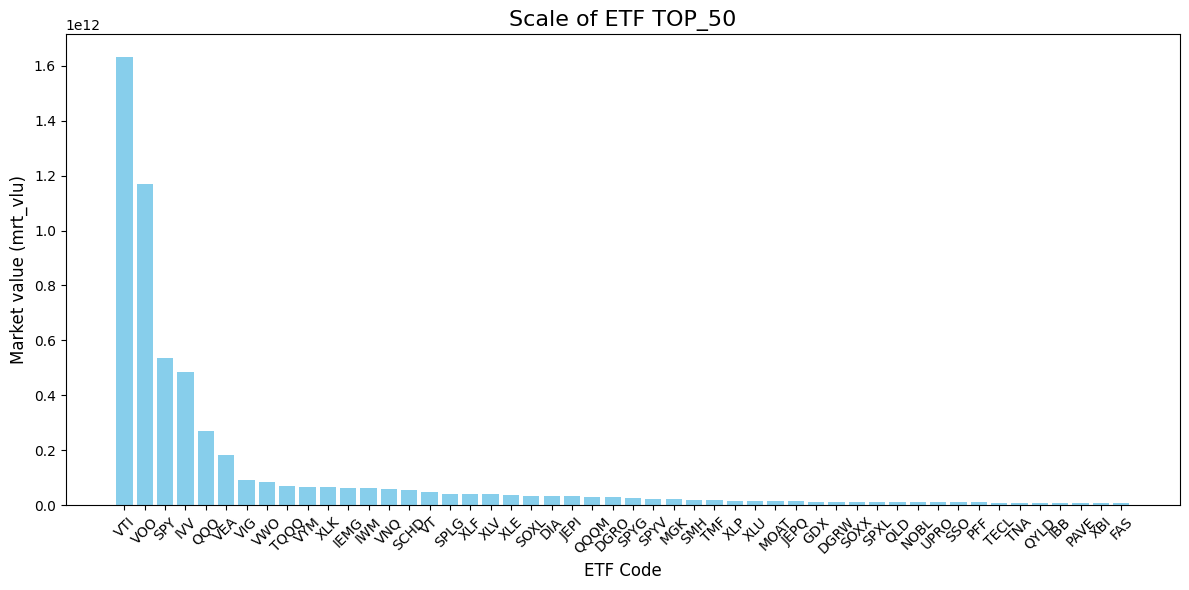

In [61]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(ETF_top50['etf_tck_cd'], ETF_top50['mkt_vlu'], color='skyblue')

# 제목 및 라벨 설정
plt.title('Scale of ETF TOP_50', fontsize=16)
plt.xlabel('ETF Code', fontsize=12)
plt.ylabel('Market value (mrt_vlu)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 회전

# 그래프 표시
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

2. 1번 파일(8월 27일 기준 해외종목 정보)에서 업종분류명, 섹터분류명, 산업명 열 빼와서 6번 파일(8월 27일 기준 ETF의 구성 종목)과 병합하기

In [62]:
data2 = pd.read_csv('C:\\Users\\11\\Downloads\\open\\NH_CONTEST_NW_FC_STK_IEM_IFO.csv', encoding='cp949')
data2_selected = data2[['tck_iem_cd', 'btp_cfc_nm', 'ser_cfc_nm', 'ids_nm', 'mkt_pr_tot_amt']]
merged_result = pd.merge(data1, data2_selected, on='tck_iem_cd', how='inner')
display(merged_result)

,etf_tck_cd,tck_iem_cd,mkt_vlu,fc_sec_eng_nm,fc_sec_krl_nm,stk_qty,wht_pct,sec_tp,btp_cfc_nm,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
0,AAPB,AAPL,36858666,AAPL,애플,215737,66.778,ST,Phones & Smart Phones,Technology,Consumer Electronics,3454684.01
1,AAPB,USD,18337384,US Dollars,프로셰어즈 울트라 반도체,0,33.222,EF,-,-,-,0.00
2,AMDL,USD,3257693,US Dollars,프로셰어즈 울트라 반도체,0,33.282,EF,-,-,-,0.00
3,AMDL,AMD,6530355,AMD,에이엠디,36558,66.718,ST,Semiconductors (NEC),Technology,Semiconductors,242772.28
4,CLOU,TWLO,15400502,TWILIO INC - A,트윌리오,254933,4.266,ST,Software (NEC),Technology,Software - Infrastructure,9743.59
...,...,...,...,...,...,...,...,...,...,...,...,...
18511,TAN,CSIQ,18712550,Canadian Solar Inc,캐나디안 솔라,1382020,1.897,ST,Photovoltaic Solar Systems & Equipment,Technology,Solar,895.02
18512,TAN,AY,18652217,Atlantica Sustainable Infrastructure PLC,아틀란티카 일드,843610,1.891,ST,Alternative Electric Utilities,Utilities,Utilities - Renewable,2588.02
18513,TAN,RNW,7690201,ReNew Energy Global PLC,리뉴 에너지,1296830,0.780,ST,Renewable IPPs,Utilities,Utilities - Renewable,2063.37
18514,TAN,AMPS,5794798,Altus Power Inc,알터스 파워,1833797,0.587,ST,Solar Electric Ultilities,Utilities,Utilities - Renewable,487.97


아래 df = etf명, etf 구성 종목, 보유종목가치, 보유종목비중, 업종분류명, 섹터분류명, 산업명

In [63]:
df=merged_result[['etf_tck_cd','tck_iem_cd', 'mkt_vlu', 'wht_pct','btp_cfc_nm', 'ser_cfc_nm', 'ids_nm']]

3. ETF 종목들을 섹터분류명(ser_cfc_nm), 총 12개 섹터로 분류

In [64]:
ETF_top.etf_tck_cd.unique()

array(['VTI', 'VOO', 'SPY', 'IVV', 'QQQ', 'VEA', 'VIG', 'VWO', 'TQQQ',
       'VYM', 'XLK', 'IEMG', 'IWM', 'VNQ', 'SCHD', 'VT', 'SPLG', 'XLF',
       'XLV', 'XLE', 'SOXL', 'DIA', 'JEPI', 'QQQM', 'DGRO', 'SPYG',
       'SPYV', 'MGK', 'SMH', 'TMF', 'XLP', 'XLU', 'MOAT', 'JEPQ', 'GDX',
       'DGRW', 'SOXX', 'SPXL', 'QLD', 'NOBL', 'UPRO', 'SSO', 'PFF',
       'TECL', 'TNA', 'QYLD', 'IBB', 'PAVE', 'XBI', 'FAS', 'XLRE', 'CIBR',
       'ITA', 'NVDL', 'ARKK', 'SPYD', 'IHI', 'TSLL', 'SPHD', 'DIVO',
       'PGX', 'LABU', 'XYLD', 'YINN', 'SKYY', 'URA', 'BOTZ', 'DPST',
       'USD', 'ICLN', 'AOR', 'UDOW', 'AIQ', 'COPX', 'GRID', 'URTY',
       'ARKW', 'ARKG', 'RYLD', 'CONL', 'NVDU', 'LIT', 'TLTW', 'JETS',
       'NAIL', 'TAN', 'ARKF', 'ARKQ', 'RPAR', 'SVOL', 'CWEB', 'SDIV',
       'QCLN', 'DFEN', 'DIV', 'AMZU', 'SOXQ', 'METV', 'DRIV', 'WEBL',
       'CLOU', 'NUSI', 'AAPU', 'MSFU', 'KRBN', 'GGLL', 'FBL', 'ARKX',
       'KBWY', 'GPIQ', 'GPIX', 'KLIP', 'KORU', 'RETL', 'MSOX', 'AAPB',
       'AWAY', '

In [65]:
lst= ['VTI', 'VOO', 'SPY', 'IVV', 'QQQ', 'VEA', 'VIG', 'VWO', 'TQQQ',
       'VYM', 'XLK', 'IEMG', 'IWM', 'VNQ', 'SCHD', 'VT', 'SPLG', 'XLF',
       'XLV', 'XLE', 'SOXL', 'DIA', 'JEPI', 'QQQM', 'DGRO', 'SPYG',
       'SPYV', 'MGK', 'SMH', 'TMF', 'XLP', 'XLU', 'MOAT', 'JEPQ', 'GDX',
       'DGRW', 'SOXX', 'SPXL', 'QLD', 'NOBL', 'UPRO', 'SSO', 'PFF',
       'TECL', 'TNA', 'QYLD', 'IBB', 'PAVE', 'XBI', 'FAS', 'XLRE', 'CIBR',
       'ITA', 'NVDL', 'ARKK', 'SPYD', 'IHI', 'TSLL', 'SPHD', 'DIVO',
       'PGX', 'LABU', 'XYLD', 'YINN', 'SKYY', 'URA', 'BOTZ', 'DPST',
       'USD', 'ICLN', 'AOR', 'UDOW', 'AIQ', 'COPX', 'GRID', 'URTY',
       'ARKW', 'ARKG', 'RYLD', 'CONL', 'NVDU', 'LIT', 'TLTW', 'JETS',
       'NAIL', 'TAN', 'ARKF', 'ARKQ', 'RPAR', 'SVOL', 'CWEB', 'SDIV',
       'QCLN', 'DFEN', 'DIV', 'AMZU', 'SOXQ', 'METV', 'DRIV', 'WEBL',
       'CLOU', 'NUSI', 'AAPU', 'MSFU', 'KRBN', 'GGLL', 'FBL', 'ARKX',
       'KBWY', 'GPIQ', 'GPIX', 'KLIP', 'KORU', 'RETL', 'MSOX', 'AAPB',
       'AWAY', 'YMAX', 'HDRO', 'TSL', 'AMDL', 'NVD']


In [66]:
df_array=[]
result_df = pd.DataFrame()

for ticker in lst:
    filtered_df = df[df['etf_tck_cd'] == ticker]
    
    # ser_cfc_nm으로 그룹화하고 wht_pct 합계 계산
    grouped_df = filtered_df.groupby('ser_cfc_nm')['wht_pct'].sum().reset_index()
    
    # ticker 열 추가
    grouped_df['etf_tck_cd'] = ticker
    
    # 결과를 합치기
    result_df = pd.concat([result_df, grouped_df], ignore_index=True)

result_df

,ser_cfc_nm,wht_pct,etf_tck_cd
0,-,0.098,VTI
1,Basic Materials,2.153,VTI
2,Communication Services,8.578,VTI
3,Consumer Cyclical,10.047,VTI
4,Consumer Defensive,5.465,VTI
...,...,...,...
657,Consumer Cyclical,55.556,TSL
658,-,33.282,AMDL
659,Technology,66.718,AMDL
660,-,33.479,NVD


1. VTI에 대한 섹터 비중 데이터

In [67]:
vti_data = result_df[result_df['etf_tck_cd'] == 'NVDL']
vti_data = vti_data.drop(columns=['etf_tck_cd'])
vti_data

,ser_cfc_nm,wht_pct
386,-,33.168
387,Technology,66.832


3. ETF 구성 종목 개수 (분산투자 정도 파악 목적)

In [68]:
etf_count = data1.groupby('etf_tck_cd')['tck_iem_cd'].count()

result_df = etf_count.reset_index(name='tck_iem_cd_count')
result_df

,etf_tck_cd,tck_iem_cd_count
0,AAPB,2
1,AAPU,10
2,AIQ,85
3,AMDL,2
4,AMZU,7
...,...,...
117,XLU,33
118,XLV,63
119,XYLD,498
120,YINN,12


3. 시가총액 큰 것 순서대로 ETF들의 거래량 내림차순 정렬
2번파일의 acl_trd_qty(누적거래수량) 활용

In [69]:
data3 = pd.read_csv('data_chanwoo/NH_CONTEST_STK_DT_QUT.csv', encoding='cp949')
etf_tck_cd_list = ETF_top['etf_tck_cd'].tolist()

data3['tck_iem_cd'] = data3['tck_iem_cd'].str.strip()
filtered_data3 = data3[data3['tck_iem_cd'].isin(etf_tck_cd_list)]
result1 = filtered_data3.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
result1_sorted = result1.sort_values(by='acl_trd_qty', ascending=False)
result1_sorted

,tck_iem_cd,acl_trd_qty
77,SOXL,4.791392e+09
94,TQQQ,3.532010e+09
83,SPY,3.213682e+09
96,TSLL,3.014736e+09
113,XLF,2.363635e+09
...,...,...
32,GPIX,3.500320e+06
11,ARKX,3.406643e+06
34,HDRO,2.650521e+06
71,RPAR,2.594178e+06


2-1. 거래량 상위 50개

In [70]:
etf_tck_cd_list = ETF_top['etf_tck_cd'].tolist()

data3['tck_iem_cd'] = data3['tck_iem_cd'].str.strip()
filtered_data3 = data3[data3['tck_iem_cd'].isin(etf_tck_cd_list)]
result1 = filtered_data3.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
result1_sorted = result1.sort_values(by='acl_trd_qty', ascending=False).head(50)
result1_sorted

,tck_iem_cd,acl_trd_qty
77,SOXL,4.791392e+09
94,TQQQ,3.532010e+09
83,SPY,3.213682e+09
96,TSLL,3.014736e+09
113,XLF,2.363635e+09
67,QQQ,2.263934e+09
59,NVD,2.221008e+09
41,IWM,2.033473e+09
60,NVDL,1.523673e+09
93,TNA,1.299177e+09


위에서 분석한 데이터 시각화

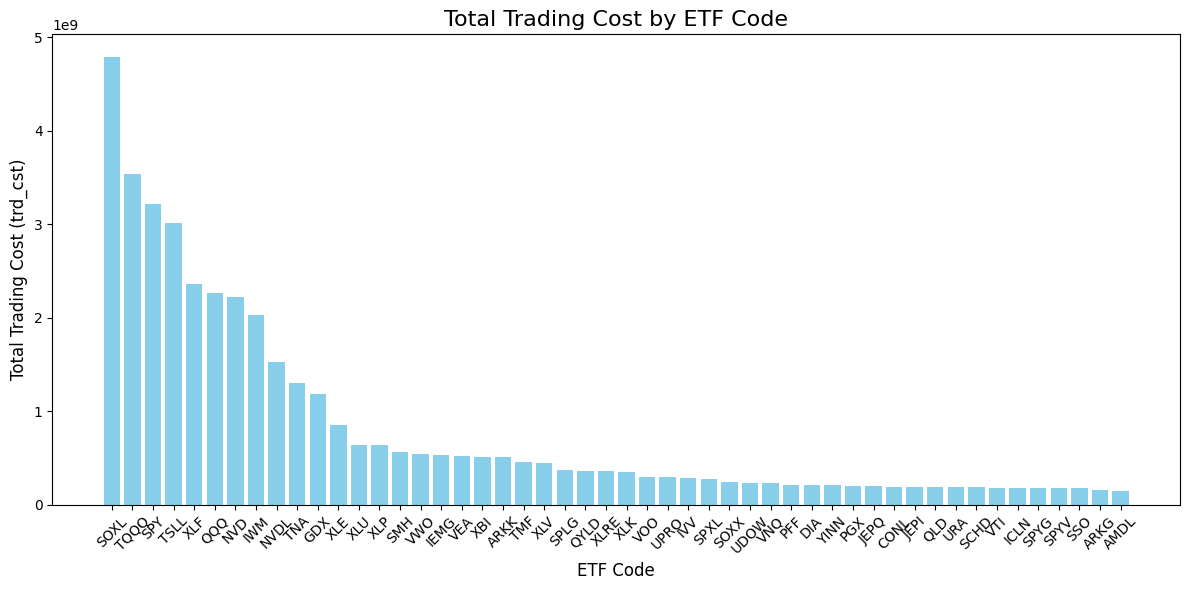

In [71]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(result1_sorted['tck_iem_cd'], result1_sorted['acl_trd_qty'], color='skyblue')

# 제목 및 라벨 설정
plt.title('Total Trading Cost by ETF Code', fontsize=16)
plt.xlabel('ETF Code', fontsize=12)
plt.ylabel('Total Trading Cost (trd_cst)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 회전

# 그래프 표시
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

4. 시가-종가 간 차이와 고가-저가 간 차이 사이의 괴리 파악 (주가 변동성 파악 목적) 

In [72]:
filtered_data3 = data3[data3['tck_iem_cd'].isin(result1_sorted['tck_iem_cd'])]

import numpy as np
# gap_ong_end 열 생성 후, 시가와 종가의 차이를 열에 넣기
filtered_data3['gap_ong_end'] = np.where(
    filtered_data3['iem_ong_pr'] > filtered_data3['iem_end_pr'],
    filtered_data3['iem_ong_pr'] - filtered_data3['iem_end_pr'],
    filtered_data3['iem_end_pr'] - filtered_data3['iem_ong_pr']
)
# gap_hi_low 열 생성, 고가 - 저가를 열에 넣기
filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']
filtered_data3

C:\Users\11\AppData\Local\Temp\ipykernel_23316\199152756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_ong_end'] = np.where(
C:\Users\11\AppData\Local\Temp\ipykernel_23316\199152756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']


,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt,gap_ong_end,gap_hi_low
8631,20240715,ARKG,25.56,25.6450,25.1400,25.44,0.10,0.39,2979973.0,76794652.0,0.0,0.0,1376.3,0.12,0.5050
8632,20240702,ARKG,23.23,23.2500,22.6700,22.89,-0.34,-1.46,1640654.0,37738883.0,0.0,0.0,1380.8,0.34,0.5800
8633,20240612,ARKG,26.25,26.7600,25.9800,26.15,0.66,2.59,3655213.0,95583820.0,1775303.0,1879910.0,1377.4,0.10,0.7800
8634,20240731,ARKG,26.93,27.9250,26.5799,26.95,0.22,0.82,2255412.0,63129010.0,0.0,0.0,1384.6,0.02,1.3451
8635,20240708,ARKG,23.40,23.7750,23.3500,23.56,0.32,1.38,1543023.0,36353740.0,0.0,0.0,1379.0,0.16,0.4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193818,20240812,YINN,20.69,21.1699,20.6700,20.88,0.48,2.35,1841827.0,38457347.0,3387719.0,4143068.0,1369.4,0.19,0.4999
193819,20240620,YINN,25.32,25.4300,24.7598,25.06,0.80,3.30,2953070.0,74003934.0,1330183.0,1622887.0,1380.8,0.26,0.6702
193820,20240617,YINN,23.84,24.2050,23.6101,24.11,0.86,3.70,2674080.0,64472068.0,960774.0,1713309.0,1377.7,0.27,0.5949
193821,20240724,YINN,21.65,22.0950,21.2300,21.26,-0.75,-3.41,3867080.0,82214120.0,0.0,0.0,1385.1,0.39,0.8650


In [73]:
# tck_iem_cd를 기준으로 평균 계산
result_avg = filtered_data3.groupby('tck_iem_cd').agg(
    avg_gap_ong_end=('gap_ong_end', 'mean'),
    avg_gap_hi_low=('gap_hi_low', 'mean')
    ).reset_index()
result_avg

# avg_gap_ong_end와 avg_gap_hi_low 기준으로 내림차순 정렬
sorted_result_avg = result_avg.sort_values(by=['avg_gap_ong_end', 'avg_gap_hi_low'], ascending=False).reset_index(drop=True)
sorted_result_avg

,tck_iem_cd,avg_gap_ong_end,avg_gap_hi_low
0,SMH,3.918413,7.264497
1,QQQ,3.609683,7.022252
2,SOXX,3.608587,6.677837
3,NVDL,3.079921,5.961194
4,CONL,2.874667,5.486130
5,IVV,2.740952,5.576256
6,SPY,2.718651,5.573914
7,VOO,2.491270,5.055130
8,XLK,2.221349,4.263103
9,SPXL,2.115714,4.355010


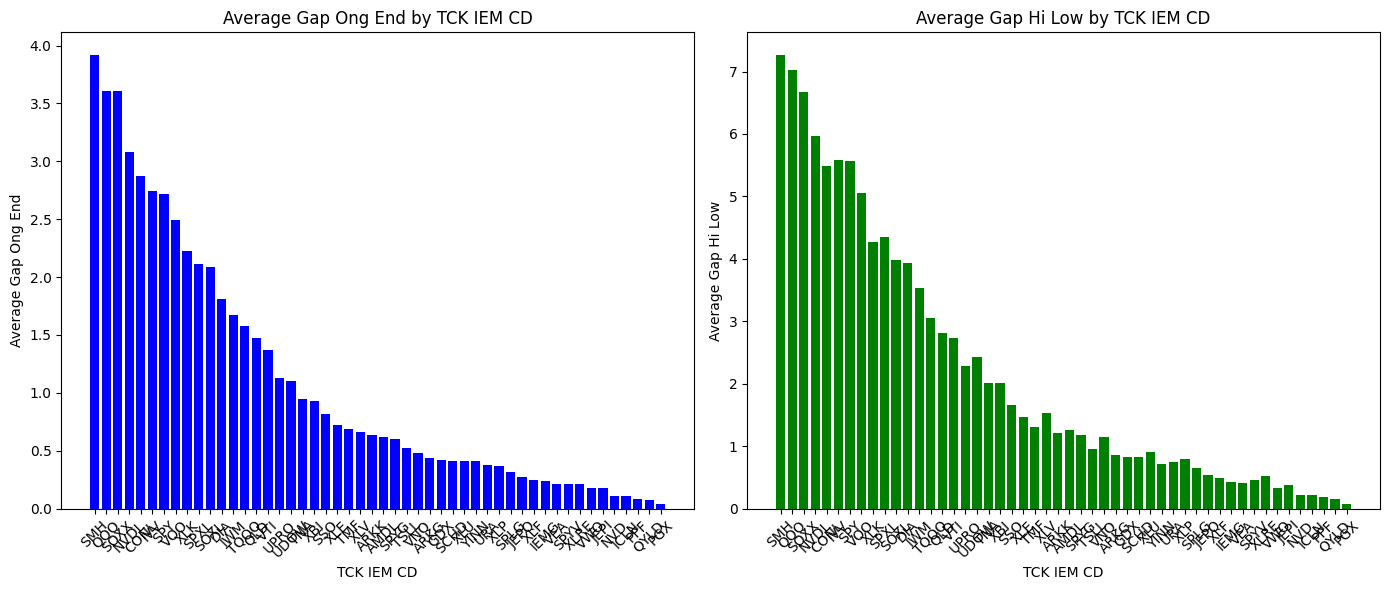

In [74]:
# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 첫 번째 그래프: avg_gap_ong_end
plt.subplot(1, 2, 1)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_ong_end'], color='blue')
plt.title('Average Gap Ong End by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Ong End')
plt.xticks(rotation=45)

# 두 번째 그래프: avg_gap_hi_low
plt.subplot(1, 2, 2)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_hi_low'], color='green')
plt.title('Average Gap Hi Low by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Hi Low')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

4.1 시가-종가 차이, 저가-고가 차이의 평균치를 합산하여 주가 변동성이 큰 순서대로 나열하기

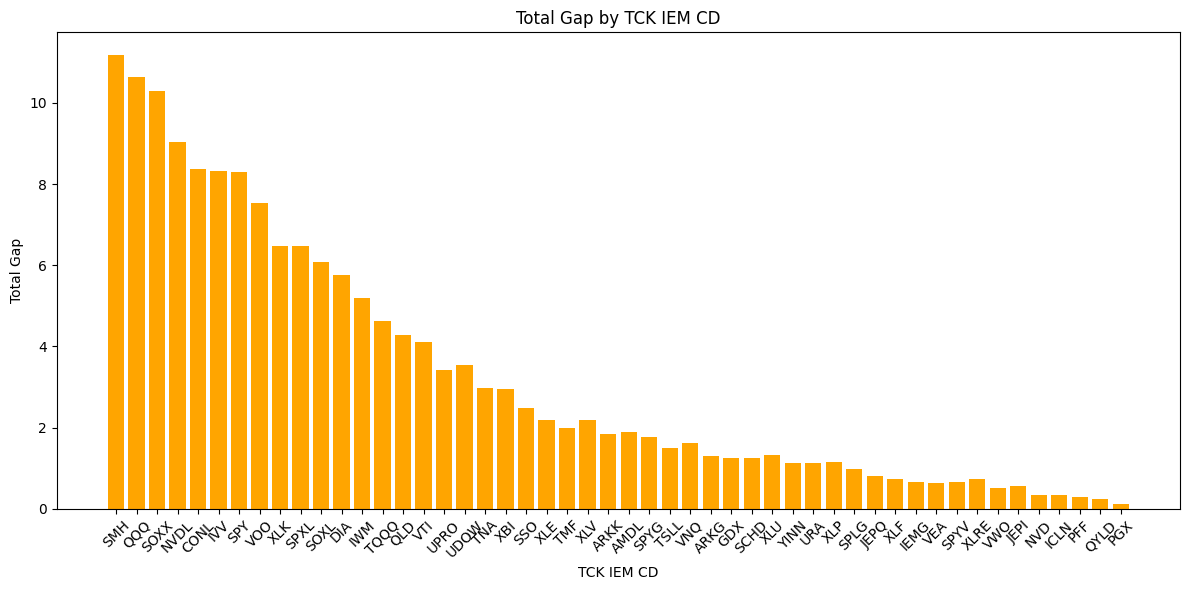

In [75]:
# avg_gap_ong_end와 avg_gap_hi_low의 합을 새로운 열로 추가
sorted_result_avg['total_gap'] = sorted_result_avg['avg_gap_ong_end'] + sorted_result_avg['avg_gap_hi_low']

# 결과를 새로운 데이터 프레임으로 생성
sum_result_avg = sorted_result_avg[['tck_iem_cd', 'total_gap']]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(sum_result_avg['tck_iem_cd'], sum_result_avg['total_gap'], color='orange')
plt.title('Total Gap by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Total Gap')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [76]:
# 구간 정의
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0~2', '2~4', '4~6', '6~8', '8~10', '10~']

# total_gap을 구간으로 나누기
sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)

# 결과 확인
sum_result_avg

C:\Users\11\AppData\Local\Temp\ipykernel_23316\2099080940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)


,tck_iem_cd,total_gap,gap_category
0,SMH,11.182910,10~
1,QQQ,10.631935,10~
2,SOXX,10.286424,10~
3,NVDL,9.041114,8~10
4,CONL,8.360797,8~10
5,IVV,8.317208,8~10
6,SPY,8.292565,8~10
7,VOO,7.546400,6~8
8,XLK,6.484452,6~8
9,SPXL,6.470724,6~8


위의 sum_result_avg 데이터 프레임 시각화하기 (구간 별로 나눠서)

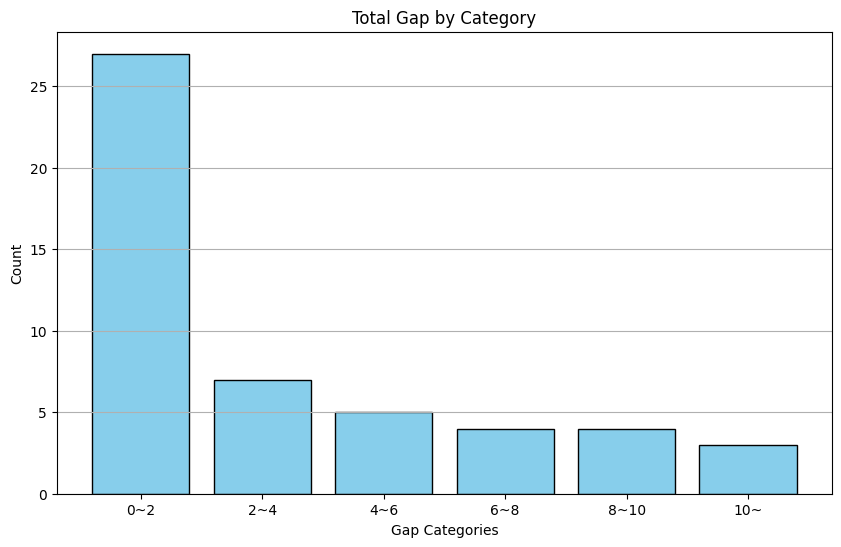

In [77]:
# 각 구간에 속하는 데이터 리스트 생성
gap_data = {label: sum_result_avg[sum_result_avg['gap_category'] == label]['tck_iem_cd'].tolist() for label in labels}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(gap_data.keys(), [len(data) for data in gap_data.values()], color='skyblue', edgecolor='black')
plt.title('Total Gap by Category')
plt.xlabel('Gap Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 그래프 표시
plt.show()

6. 배당금의 평균치를 가장 최근의 종가로 나눠서 시가배당률을 계산한다.
-> 이유 : 투자자들이 etf를 산 시점의 가격으로 배당률이 정해지기 때문에, 즉, 매일매일 시가배당률이 바뀌기 때문에 배당금 평균치와 최근 종가 데이터 모두 크롤링을 사용하여 구하는 게 베스트일 거라고 생각함.
- 배당금 평균치는 가장 늦게 배당금을 지급하기 시작한 etf를 찾고, 그 일자를 기준으로 현재까지의 배당금 데이터를 추출.
- 

In [78]:
data4

,etf_tck_cd,ediv_dt,ddn_amt,aed_stkp_ddn_amt,ddn_bse_dt,ddn_pym_dt,pba_dt,ddn_pym_fcy_cd
0,AAON,20230608,0.12,0.08,20230609,20230630,20230518,Quarterly
1,AAON,20240315,0.08,0.08,20240318,20240329,20240301,Quarterly
2,AAON,20230907,0.08,0.08,20230908,20230929,20230818,Quarterly
3,AAON,20230310,0.12,0.08,20230313,20230331,20230301,Quarterly
4,AAON,20221125,0.24,0.16,20221128,20221216,20221108,SemiAnnual
...,...,...,...,...,...,...,...,...
12852,ZION,20230816,0.41,0.41,20230817,20230824,20230728,Quarterly
12853,ZION,20240214,0.41,0.41,20240215,20240222,20240202,Quarterly
12854,ZION,20230215,0.41,0.41,20230216,20230223,20230127,Quarterly
12855,ZION,20230517,0.41,0.41,20230518,20230525,20230505,Quarterly


In [79]:
data4 = pd.read_csv('data_yoonseo/NH_CONTEST_DATA_HISTORICAL_DIVIDEND.csv', encoding='cp949')

# 내부 조인 수행
merged_data = pd.merge(data4, ETF_top, on='etf_tck_cd', how='inner')

required_columns = [
    'etf_tck_cd',
    'ediv_dt',
    'ddn_amt',
    'aed_stkp_ddn_amt',
    'ddn_bse_dt',
    'ddn_pym_dt',
    'pba_dt',
    'ddn_pym_fcy_cd'
]
filtered_merged_data = merged_data[required_columns]

filtered_merged_data

,etf_tck_cd,ediv_dt,ddn_amt,aed_stkp_ddn_amt,ddn_bse_dt,ddn_pym_dt,pba_dt,ddn_pym_fcy_cd
0,AAPB,20231227,4.30641,4.30641,20231228,20231229,20231226,Monthly
1,AAPU,20220920,0.01041,0.01041,20220921,20220927,20220919,Quarterly
2,AAPU,20230919,0.14642,0.14642,20230920,20230926,20230918,Quarterly
3,AAPU,20231221,0.27249,0.27249,20231222,20231229,20231220,Quarterly
4,AAPU,20230321,0.07802,0.07802,20230322,20230328,20230320,Quarterly
...,...,...,...,...,...,...,...,...
995,YMAX,20240717,0.65160,0.65160,20240717,20240718,20240122,Monthly
996,YMAX,20240614,0.73000,0.73000,20240614,20240617,20240122,Monthly
997,YMAX,20240215,0.53390,0.53390,20240216,20240220,20240122,Monthly
998,YMAX,20240314,0.56800,0.56800,20240315,20240318,20240122,Monthly


In [80]:
unique_etf_tickers_df = filtered_merged_data[['etf_tck_cd']].drop_duplicates()
unique_etf_tickers_list = unique_etf_tickers_df['etf_tck_cd'].tolist()
unique_etf_tickers_list

['AAPB',
 'AAPU',
 'AWAY',
 'CIBR',
 'CONL',
 'CWEB',
 'DGRW',
 'DIA',
 'DIV',
 'DPST',
 'DRIV',
 'GDX',
 'GGLL',
 'GPIX',
 'GRID',
 'IBB',
 'ICLN',
 'IEMG',
 'IHI',
 'IVV',
 'IWM',
 'JEPI',
 'JEPQ',
 'KBWY',
 'KLIP',
 'KRBN',
 'LABU',
 'MOAT',
 'MSFU',
 'NOBL',
 'NUSI',
 'NVD',
 'NVDL',
 'NVDU',
 'PAVE',
 'PFF',
 'QCLN',
 'RPAR',
 'RYLD',
 'SDIV',
 'SKYY',
 'SOXL',
 'SOXQ',
 'SOXX',
 'SPY',
 'SPYD',
 'SVOL',
 'TAN',
 'TECL',
 'TLTW',
 'TNA',
 'TQQQ',
 'TSL',
 'TSLL',
 'UDOW',
 'UPRO',
 'URA',
 'USD',
 'VEA',
 'VNQ',
 'VT',
 'VTI',
 'XBI',
 'XLE',
 'XLF',
 'XLK',
 'XLP',
 'XLRE',
 'XLU',
 'XLV',
 'XYLD',
 'AIQ',
 'AMZU',
 'AOR',
 'ARKK',
 'BOTZ',
 'COPX',
 'DFEN',
 'DGRO',
 'DIVO',
 'FAS',
 'FBL',
 'GPIQ',
 'HDRO',
 'ITA',
 'KORU',
 'LIT',
 'METV',
 'MGK',
 'NAIL',
 'PGX',
 'QLD',
 'QQQ',
 'QQQM',
 'QYLD',
 'RETL',
 'SCHD',
 'SMH',
 'SPHD',
 'SPLG',
 'SPXL',
 'SPYG',
 'SPYV',
 'SSO',
 'TMF',
 'URTY',
 'VIG',
 'VOO',
 'VWO',
 'VYM',
 'WEBL',
 'YINN',
 'YMAX']

In [ ]:
import yfinance as yf

# 배당금 지급 이력을 저장할 데이터프레임 리스트
dividend_records = []

# 시작 날짜
start_date = '2020-01-30'

# 각 ETF에 대해 배당금 데이터 가져오기
for etf in unique_etf_tickers_list:
    ticker = yf.Ticker(etf)
    dividends = ticker.dividends

    # 2020년 1월 30일 이후의 데이터 필터링
    filtered_dividends = dividends[dividends.index >= start_date]

    if not filtered_dividends.empty:
        filtered_dividends = filtered_dividends.reset_index()
        filtered_dividends['ETF'] = etf  # ETF 이름 추가
        dividend_records.append(filtered_dividends)

# 결과 데이터프레임 생성
result_df1 = pd.concat(dividend_records, ignore_index=True) if dividend_records else pd.DataFrame()

# 결과 출력
if not result_df1.empty:
    print(result_df1[['ETF', 'Date', 'Dividends']])
else:
    print("No dividend data found for the specified date range.")

ETF들의 배당을 싹 다 연배당으로 환산.

In [55]:
# 배당금 지급 이력을 저장할 데이터프레임 리스트
dividend_records = []

# 각 ETF에 대해 배당금 데이터 가져오기
for etf in unique_etf_tickers_list:
    ticker = yf.Ticker(etf)
    dividends = ticker.dividends

    # 2020년 1월 30일 이후의 데이터 필터링
    filtered_dividends = dividends[dividends.index >= '2020-01-30']

    if not filtered_dividends.empty:
        filtered_dividends = filtered_dividends.reset_index()
        filtered_dividends['ETF'] = etf  # ETF 이름 추가
        dividend_records.append(filtered_dividends)

# 결과 데이터프레임 생성
result_df2 = pd.concat(dividend_records, ignore_index=True) if dividend_records else pd.DataFrame()

# 배당금 계산
if not result_df2.empty:
    # 각 ETF의 연도별 배당금 합산
    annual_dividend_results = []
    for etf in result_df2['ETF'].unique():
        etf_data = result_df2[result_df2['ETF'] == etf]
        
        # 연도별로 그룹화하여 배당금 합산
        etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
        annual_totals = etf_data.groupby('Year')['Dividends'].sum().reset_index()

        # 총 배당금 계산 (모든 연도의 합산)
        total_dividend = annual_totals['Dividends'].sum()

        # 연간 배당금 평균 계산
        average_annual_dividend = total_dividend / len(annual_totals)

        annual_dividend_results.append({
            'ETF': etf,
            'Total Dividend': total_dividend,
            'Average Annual Dividend': average_annual_dividend
        })

    # 결과 데이터프레임 생성
    result_df2 = pd.DataFrame(annual_dividend_results)

    # 결과 출력
    print(result_df2)
else:
    print("No dividend data found for the specified date range.")

C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

      ETF  Total Dividend  Average Annual Dividend
0    AAPB           4.306                 4.306000
1    AAPU           1.331                 0.443667
2    AWAY           0.071                 0.035500
3    CIBR           1.250                 0.250000
4    CONL           0.109                 0.109000
..    ...             ...                      ...
108   VWO           5.649                 1.129800
109   VYM          15.264                 3.052800
110  WEBL           3.051                 3.051000
111  YINN           5.894                 1.178800
112  YMAX           5.096                 5.096000

[113 rows x 3 columns]


C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
C:\Users\11\AppData\Local\Temp\ipykernel_23316\4178655888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

ETF 최근 종가 데이터.

In [40]:
# 종가 데이터를 저장할 데이터 프레임 생성
closing_prices = {}

# 각 ETF의 최근 종가를 가져오기
for ticker in unique_etf_tickers_list:
    stock_data = yf.Ticker(ticker)
    # 최근 종가를 가져온 후 데이터 사전에 저장
    closing_prices[ticker] = stock_data.history(period='1d')['Close'].iloc[-1]

# 결과를 데이터 프레임으로 변환
closing_prices_df = pd.DataFrame(list(closing_prices.items()), columns=['etf_tck_cd', 'recent_close'])

# 결과 출력
print(closing_prices_df)

    etf_tck_cd  recent_close
0         AAPB     28.370001
1         AAPU     35.939999
2         AWAY     20.610001
3         CIBR     59.779999
4         CONL     22.530001
..         ...           ...
108        VWO     49.060001
109        VYM    128.679993
110       WEBL     19.440001
111       YINN     51.830002
112       YMAX     17.600000

[113 rows x 2 columns]


시가배당률 계산하기 = (평균 배당금 / 최근 종가) * 100

In [56]:
# result_df2와 closing_prices_df를 ETF 코드로 병합
merged_df = pd.merge(result_df2, closing_prices_df, left_on='ETF', right_on='etf_tck_cd', how='inner')

# Average Annual Dividend를 recent_close로 나누기
merged_df['Dividend per Price'] = merged_df['Average Annual Dividend'] / merged_df['recent_close'] * 100

# 결과 출력
print(merged_df[['ETF', 'Average Annual Dividend', 'recent_close', 'Dividend per Price']])

      ETF  Average Annual Dividend  recent_close  Dividend per Price
0    AAPB                 4.306000     28.370001           15.178004
1    AAPU                 0.443667     35.939999            1.234465
2    AWAY                 0.035500     20.610001            0.172246
3    CIBR                 0.250000     59.779999            0.418200
4    CONL                 0.109000     22.530001            0.483799
..    ...                      ...           ...                 ...
108   VWO                 1.129800     49.060001            2.302894
109   VYM                 3.052800    128.679993            2.372397
110  WEBL                 3.051000     19.440001           15.694444
111  YINN                 1.178800     51.830002            2.274358
112  YMAX                 5.096000     17.600000           28.954545

[113 rows x 4 columns]
